In [1]:
!pip3 install prophet

In [10]:
import pandas as pd
# Loading the dataset, organized and structured format
# and perform operations on the right variables

df = pd.read_csv("SUMMER Forecasting - Sheet1.csv")
df = df.rename(columns={"DATE": "ds", "USAGE": "y", "TEMP": "temperature"})
df

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.10 from "/Users/ana/anaconda3/bin/python"
  * The NumPy version is: "1.23.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/ana/anaconda3/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/libopenblas.0.dylib
  Referenced from: <565CCDA0-1598-30EB-9212-737683B9FED1> /Users/ana/anaconda3/lib/python3.10/site-packages/numpy/core/_multiarray_umath.cpython-310-darwin.so
  Reason: tried: '/Users/ana/anaconda3/lib/python3.10/site-packages/numpy/core/../../../../libopenblas.0.dylib' (no such file), '/Users/ana/anaconda3/lib/python3.10/site-packages/numpy/core/../../../../libopenblas.0.dylib' (no such file), '/Users/ana/anaconda3/bin/../lib/libopenblas.0.dylib' (no such file), '/Users/ana/anaconda3/bin/../lib/libopenblas.0.dylib' (no such file), '/usr/local/lib/libopenblas.0.dylib' (no such file), '/usr/lib/libopenblas.0.dylib' (no such file, not in dyld cache)


In [11]:
#forecast for 6 months
import numpy as np
from scipy.integrate import trapz
from neuralprophet import NeuralProphet, set_log_level
import pandas as pd

# Data preprocessing so that AI efficiently interprets values and understands what to account for

# Grouping data by date and summing up the values, packages values into one 
df = df.groupby('ds').sum().reset_index()

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Creating the NeuralProphet model
m = NeuralProphet(
    
    # Disable trend changepoints to account for outliers 
    n_changepoints=10,

    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    
    n_forecasts=183 #forecast for 180 days in the future with 180 forecast lines
)
m.set_plotting_backend("plotly")

# Adding temperature as a lagged regressor, the model is able to percieve that temperature will become another factor 
m.add_lagged_regressor("temperature")

# Training the model: supervised learning, training on historical data to draw patterns
metrics = m.fit(df)

# Adding temperatures to the future data frame of future dates 
future_temps = [57,55,53,54,50,53,52,52,46,46,51,53,46,48,51,46,43,46,46,51,56,52,49,46,47,45,47,57,45,57,55,53,54,50,53,52,52,46,46,51,53,46,48,51,46,43,46,46,51,56,52,49,46,47,45,47,57,45,57,55,53,54,50,53,52,52,46,46,51,53,46,48,51,46,43,46,46,51,56,52,49,46,47,45,47,57,45,57,55,53,54,50,53,52,52,46,46,51,53,46,48,51,46,43,46,46,51,56,52,49,46,47,45,47,57,45,57,55,53,54,50,53,52,52,46,46,51,53,46,48,51,46,43,46,46,51,56,52,49,46,47,45,47,57,45,57,55,53,54,50,53,52,52,46,46,51,53,46,48,51,46,43,46,46,51,56,52,49,46,47,45,47,57,45, 45, 45, 45]  # Replace with your list of temperatures
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=183)
df_future['temperature'] = df['temperature'].append(pd.Series(future_temps)).reset_index(drop=True)  # Add the new 'temperature' column to the dataframe

# Predict the future,  deep learning architechture uses statistical calculations 
forecast = m.predict(df_future)

#Plot, shows clear visualizations to users

fig1 = m.plot(forecast)
fig1.show()

# Calculating the net energy consumption
integral = forecast['yhat1'].sum()


print("Net energy consumption for the 12 months is", integral)

Finding best initial lr:   0%|          | 0/211 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /var/folders/m3/l6xfs3hd47s_t88s13hfb7s40000gn/T/ipykernel_23784/1181506987.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Predicting: 1it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually t

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually t

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually t

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually t

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:95: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually 

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


WARNING - (py.warnings._showwarnmsg) - /Users/ana/anaconda3/lib/python3.10/site-packages/neuralprophet/data/process.py:127: PerformanceWarning:

DataFrame is highly fragmented.  This is usuall

Net energy consumption for the 12 months is -3141.1525497436523


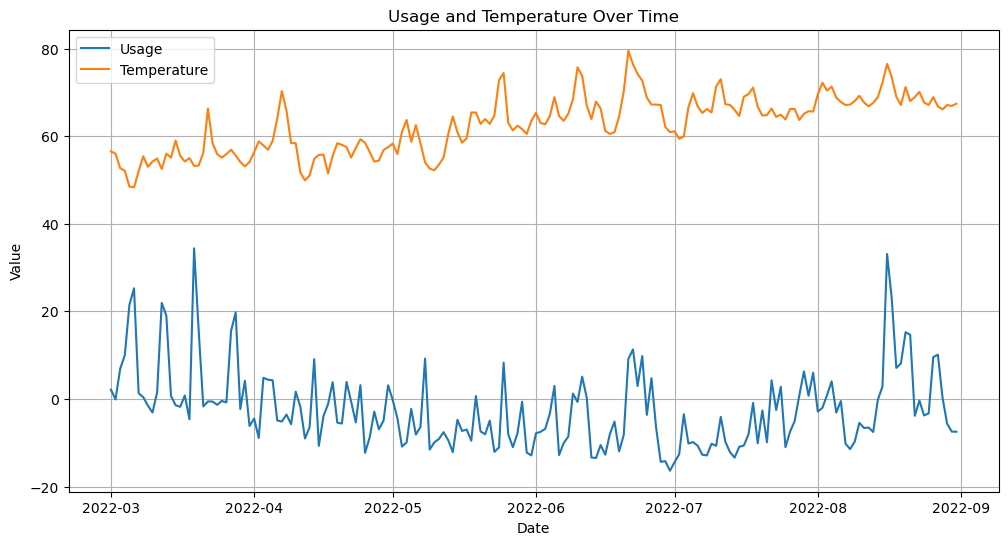

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and renamed your DataFrame as described in your question

# Convert the 'ds' column to datetime if it's not already
df['ds'] = pd.to_datetime(df['ds'])

# Sort the DataFrame by the 'ds' column (date) for a chronological plot
df = df.sort_values(by='ds')

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(df['ds'], df['y'], label='Usage')
plt.plot(df['ds'], df['temperature'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Usage and Temperature Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()